<a href="https://colab.research.google.com/github/Saharuth/MachineLearning/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
print(f'pandas  version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'numpy   version: {np.__version__}')

pandas  version: 1.5.3
seaborn version: 0.12.2
numpy   version: 1.23.5


In [ ]:
df = pd.read_csv('https://github.com/Saharuth/MachineLearning/raw/main/ISLR_Advertising.csv', usecols=[1, 2, 3, 4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


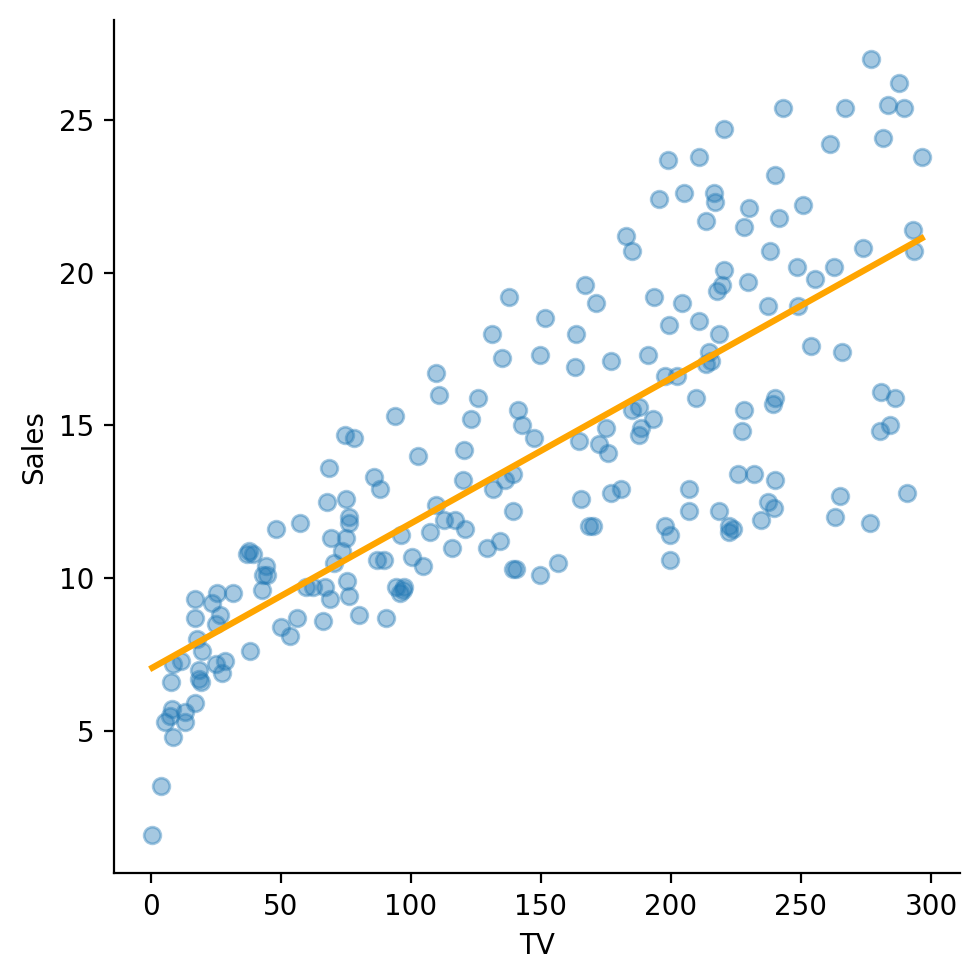

In [ ]:
# linear model plot
sns.lmplot(x='TV', y='Sales', data=df, ci=None, scatter_kws={'alpha': 0.4}, line_kws={'color': 'orange'})
# scatter_kws => plot จุดแบบกระจายตัว
# line_kws => กราฟที่ได้

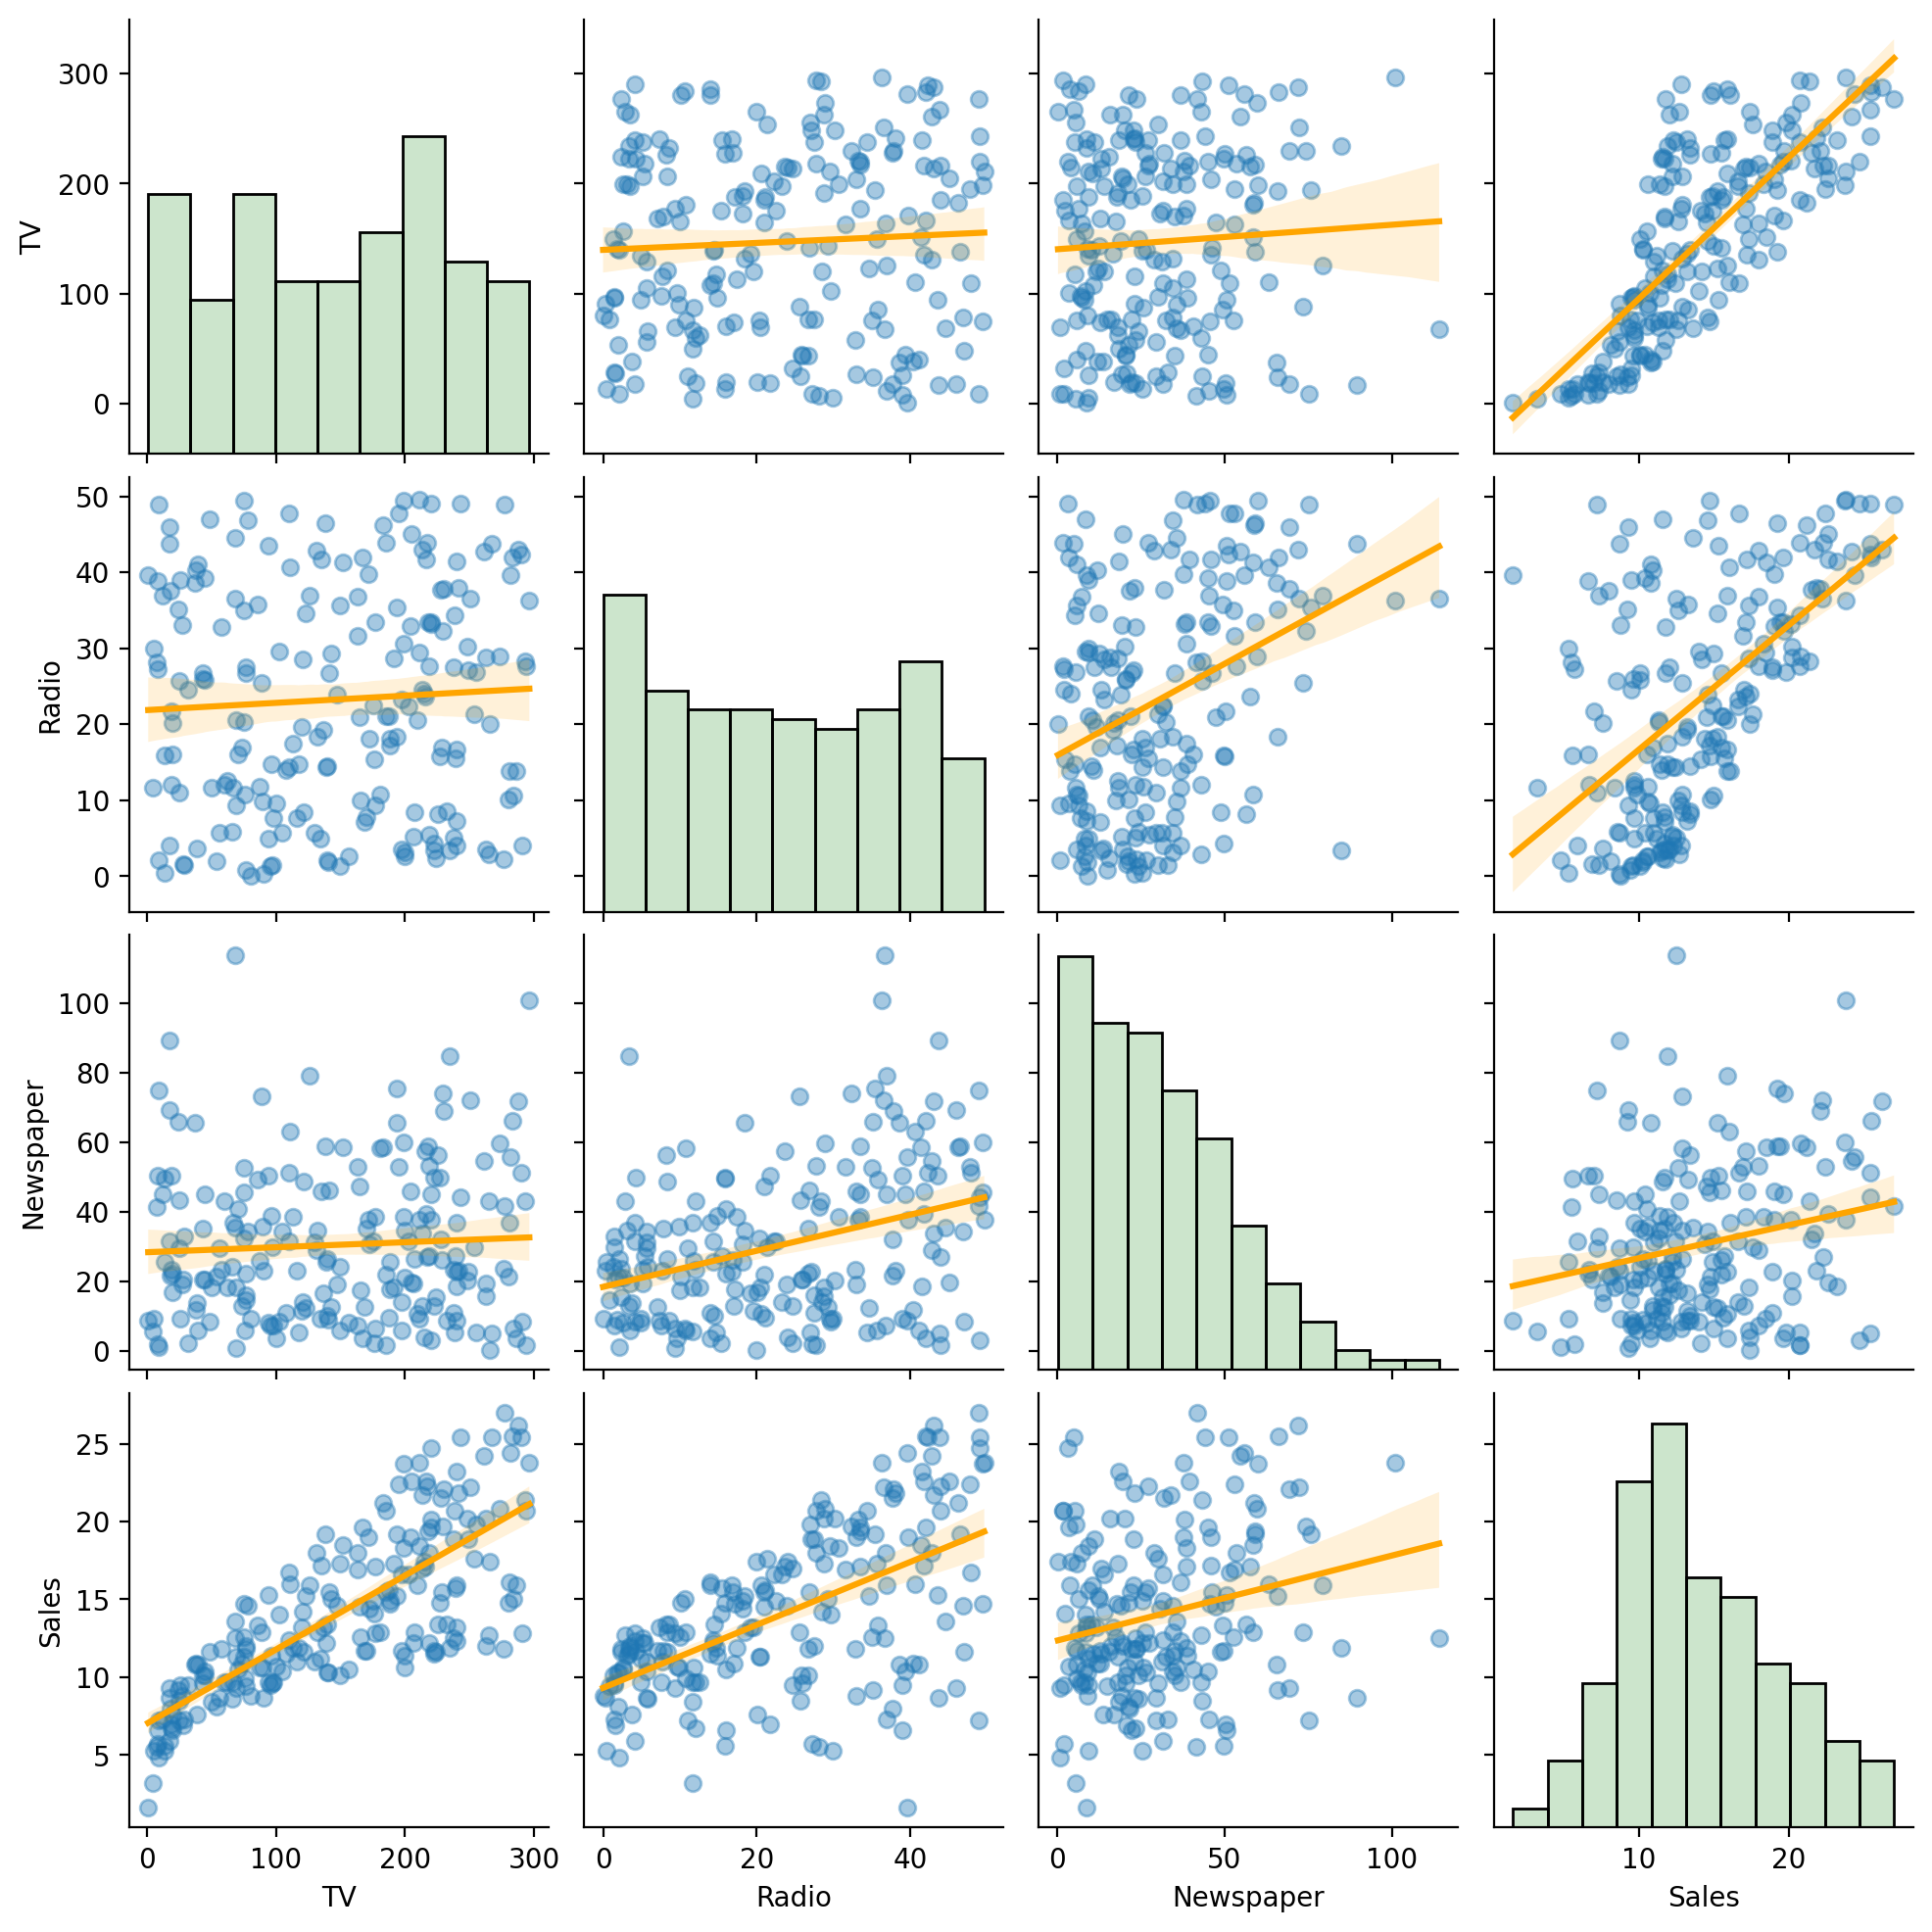

In [ ]:
# pairplot => จับคู่ข้อมูลมา plot
sns.pairplot(df, kind='reg',
             plot_kws={
              'scatter_kws':{
                'alpha': 0.4
                },
              'line_kws': {
                'color': 'orange'
                }
              },
             diag_kws={
              'color': 'green',
              'alpha': .2
              });

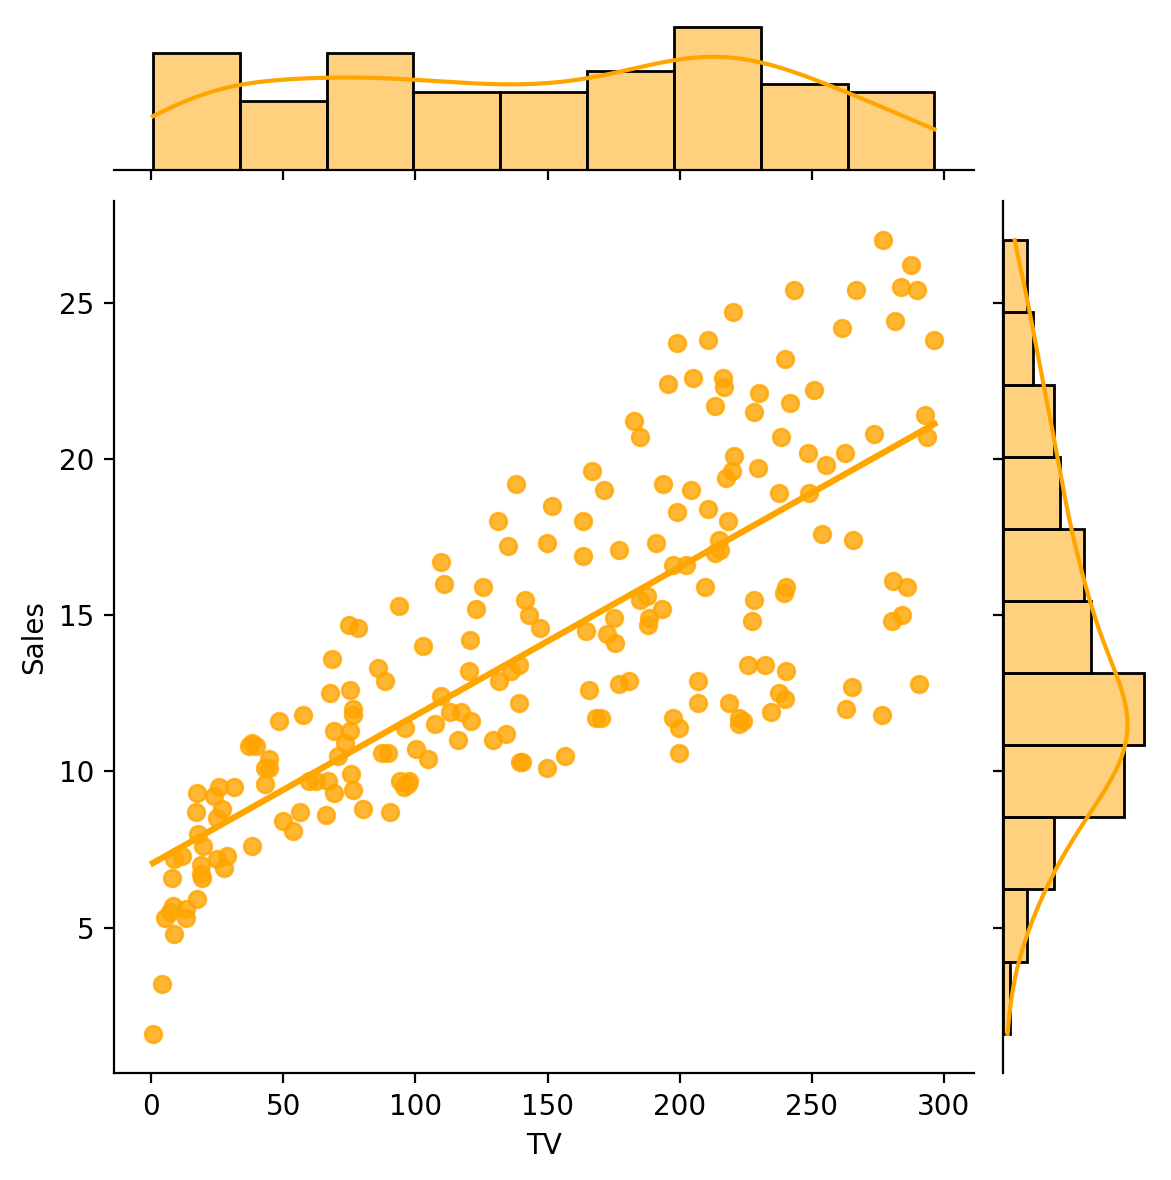

In [ ]:
sns.jointplot(x='TV', y='Sales', data=df, kind='reg', ci=None, color='orange')

#sklearn: LinearRegression
####Y = M X + C
####M => Slope Coefficient
####C => Y Intercept

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.2


In [ ]:
model = LinearRegression()
print(model)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()


In [ ]:
len(df)
X = df.drop(columns=['Sales'])[:140]
y = df['Sales'][:140]
len(X)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
print(X.head())
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [ ]:
# train model
model.fit(X, y)

LinearRegression()

In [ ]:
model.score(X, y)

0.8937102367013778

In [ ]:
model.intercept_

3.0451422090371167

In [ ]:
X.head(0)

,TV,Radio,Newspaper


In [ ]:
# ค่า coef ของ X แต่ละตัว
model.coef_

array([ 0.04704868,  0.17968299, -0.00300557])

In [ ]:
model.predict([[200, 40, 70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837])

In [ ]:
model.predict([[200, 40, 70],
               [100, 80, 50],
               [ 40, 20, 10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837, 21.97437115,  8.49069357])

In [ ]:
# แบ่งข้อมูลสำหรับ test model
X_test = df.drop(columns=['Sales'])[140:]
X_test.head()

,TV,Radio,Newspaper
140,73.4,17.0,12.9
141,193.7,35.4,75.6
142,220.5,33.2,37.9
143,104.6,5.7,34.4
144,96.2,14.8,38.9


In [ ]:
# ทำนาย result จากข้อมูล X_test
y_hat = model.predict(X_test)
print(y_hat)

[ 9.5143544  18.29202877 19.27094064  8.88723582 10.11361706  9.96041972
 15.62706788 23.1587013  12.03845031  9.72212471 18.63809455 10.10099867
 16.48589616 18.12468609 15.64364266  5.30523275 15.12744231 10.25358725
 10.09006252 12.44362791 14.3210309  13.3616908  15.08443331 17.32769433
 11.18435749 14.4341081  10.57847377 13.65085298 17.24682604 18.30648623
  7.42659652 14.39756088  7.52782982 12.20541805 14.08031808 24.73378746
 20.09744782 12.3485591  16.40555117 12.5803357  10.85519521 14.21321462
  6.62420582 24.08691176 18.72317811 20.7349155   9.90581943 17.13834561
 18.98753788  6.02878648 12.27110367  8.5198605   4.49610391 18.42872767
 16.46701074  5.46575208  8.33322951 13.02457489 23.73586521 15.48426632]


In [ ]:
# เปรียบเทียบผลลัพธ์ที่ได้จากการ test กับข้อมูลจริง
dc = pd.concat([df[140:].reset_index(), pd.Series(y_hat, name='predicted')], axis='columns')
dc

##Statsmodels: Multiple Linear Regression
####ให้ข้อมูลที่ละเอียดกว่า sklearn

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf #ช่วยให้เราเขียนสมการ regression แบบภาษา R

In [ ]:
model_a = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df[:140]).fit()
# Sales เป็นคอลัมน์ที่ถูกทำนาย ด้วยการประมาณข้อมูลคอลัมน์ TV Radio Newspaper

In [ ]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           5.60e-66
Time:                        09:56:24   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0451      0.391      7.782      0.0

In [ ]:
model_a.params

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [ ]:
model_a.pvalues

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64